In [3]:
import pandas as pd
from pathlib import Path

## Configuração de Caminhos

Usamos `Path` da `pathlib` para construir caminhos de forma portável entre sistemas operacionais.

In [4]:
# Cria objeto Path para a pasta de dados
pasta_dados = Path('data')

# Cria caminho para subpasta 'raw' dentro de 'data'
pasta_dados_brutos = pasta_dados / 'raw'

# Exibe os caminhos criados
print(f"Caminhos:\n  Dados: {pasta_dados}\n  - Raw:   {pasta_dados_brutos}")


Caminhos:
  Dados: data
  - Raw:   data\raw


In [5]:
caminho_titanic_bruto = pasta_dados_brutos / 'titanic.csv' # caminho do arquivo
raw_df = pd.read_csv(caminho_titanic_bruto)
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Profiling Inicial do DataFrame

Análise exploratória rápida para entender estrutura, tipos e possíveis problemas nos dados.

In [6]:
# Informações básicas sobre o DataFrame
print("=== INFORMAÇÕES BÁSICAS ===")
print(f"Dimensões: {raw_df.shape}")
print(f"Total de registros: {len(raw_df)}")
print(f"Total de colunas: {len(raw_df.columns)}")
print(f"Memória usada: {raw_df.memory_usage(deep=True).sum() / 1024:.1f} KB")

=== INFORMAÇÕES BÁSICAS ===
Dimensões: (891, 12)
Total de registros: 891
Total de colunas: 12
Memória usada: 285.6 KB


In [7]:
# Tipos de dados por coluna
print("\n=== TIPOS DE DADOS ===")
print(raw_df.dtypes)


=== TIPOS DE DADOS ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# Valores ausentes por coluna
print("\n=== VALORES AUSENTES ===")
valores_ausentes = raw_df.isnull().sum()
percentual_ausentes = (valores_ausentes / len(raw_df)) * 100

ausentes_df = pd.DataFrame({
    'Ausentes': valores_ausentes,
    'Percentual': percentual_ausentes.round(1)
})
print(ausentes_df[ausentes_df['Ausentes'] > 0])


=== VALORES AUSENTES ===
          Ausentes  Percentual
Age            177        19.9
Cabin          687        77.1
Embarked         2         0.2


In [9]:
# Estatísticas descritivas para colunas numéricas
print("\n=== ESTATÍSTICAS NUMÉRICAS ===")
raw_df.describe()


=== ESTATÍSTICAS NUMÉRICAS ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Valores únicos para colunas categóricas
print("\n=== VALORES ÚNICOS (CATEGÓRICAS) ===")
colunas_categoricas = raw_df.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    valores_unicos = raw_df[coluna].nunique()
    print(f"{coluna}: {valores_unicos} valores únicos")
    if valores_unicos <= 10:  # Mostra valores se poucos
        print(f"  → {list(raw_df[coluna].unique())}")
    print()


=== VALORES ÚNICOS (CATEGÓRICAS) ===
Name: 891 valores únicos

Sex: 2 valores únicos
  → ['male', 'female']

Ticket: 681 valores únicos

Cabin: 147 valores únicos

Embarked: 3 valores únicos
  → ['S', 'C', 'Q', nan]



In [11]:
# Verificação de registros duplicados
print("=== DUPLICATAS ===")
duplicatas = raw_df.duplicated().sum()
print(f"Registros duplicados: {duplicatas}")

if duplicatas > 0:
    print("Primeiras 5 duplicatas:")
    print(raw_df[raw_df.duplicated()].head())

=== DUPLICATAS ===
Registros duplicados: 0


## Visualizações Exploratórias

Gráficos simples para entender distribuições e padrões nos dados usando pandas.plot().

In [12]:
import matplotlib.pyplot as plt

# Configuração básica dos gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

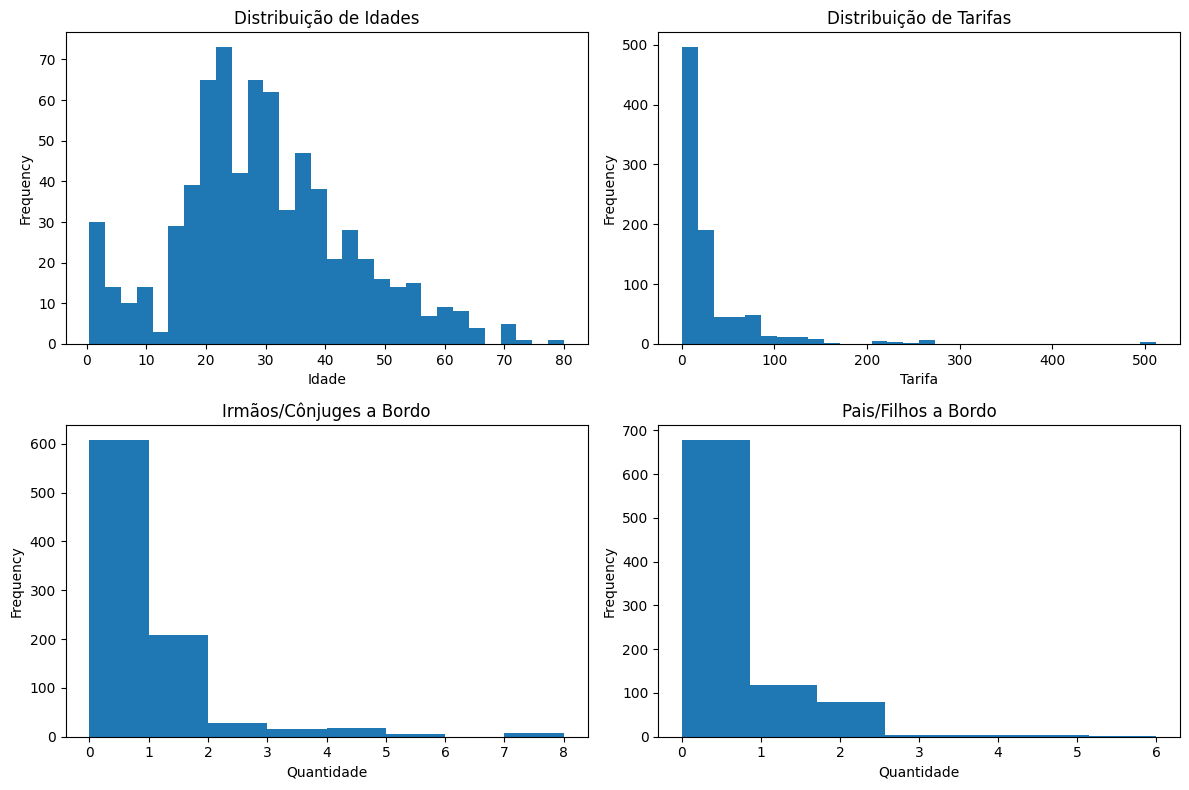

In [13]:
# Histogramas das variáveis numéricas principais
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Age - distribuição de idades
raw_df['Age'].plot(kind='hist', bins=30, ax=axes[0,0], title='Distribuição de Idades')
axes[0,0].set_xlabel('Idade')

# Fare - distribuição de tarifas
raw_df['Fare'].plot(kind='hist', bins=30, ax=axes[0,1], title='Distribuição de Tarifas')
axes[0,1].set_xlabel('Tarifa')

# SibSp - irmãos/cônjuges a bordo
raw_df['SibSp'].plot(kind='hist', bins=8, ax=axes[1,0], title='Irmãos/Cônjuges a Bordo')
axes[1,0].set_xlabel('Quantidade')

# Parch - pais/filhos a bordo
raw_df['Parch'].plot(kind='hist', bins=7, ax=axes[1,1], title='Pais/Filhos a Bordo')
axes[1,1].set_xlabel('Quantidade')

plt.tight_layout()
plt.show()

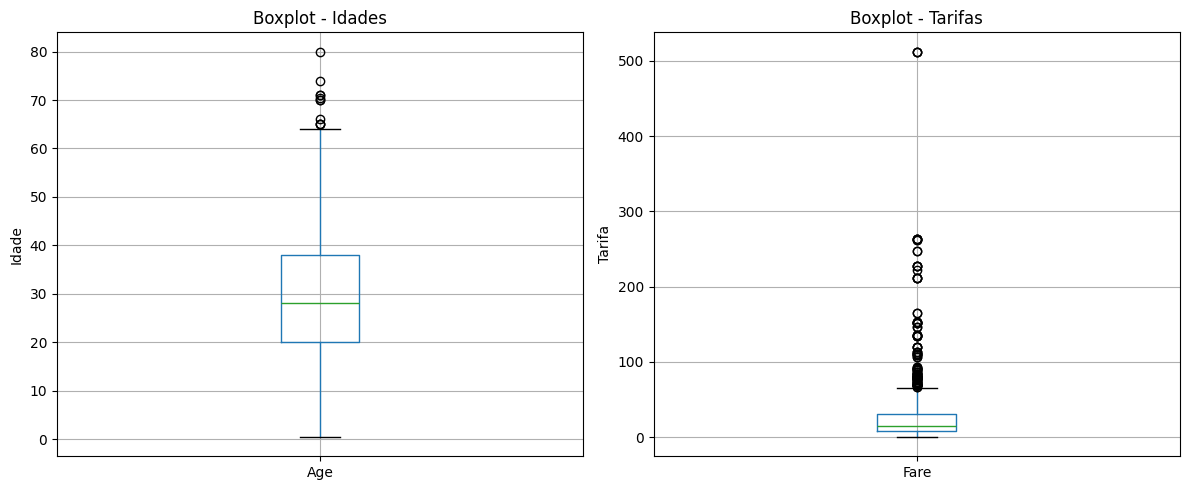

In [14]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age - boxplot para outliers de idade
raw_df.boxplot(column='Age', ax=axes[0])
axes[0].set_title('Boxplot - Idades')
axes[0].set_ylabel('Idade')

# Fare - boxplot para outliers de tarifa
raw_df.boxplot(column='Fare', ax=axes[1])
axes[1].set_title('Boxplot - Tarifas')
axes[1].set_ylabel('Tarifa')

plt.tight_layout()
plt.show()

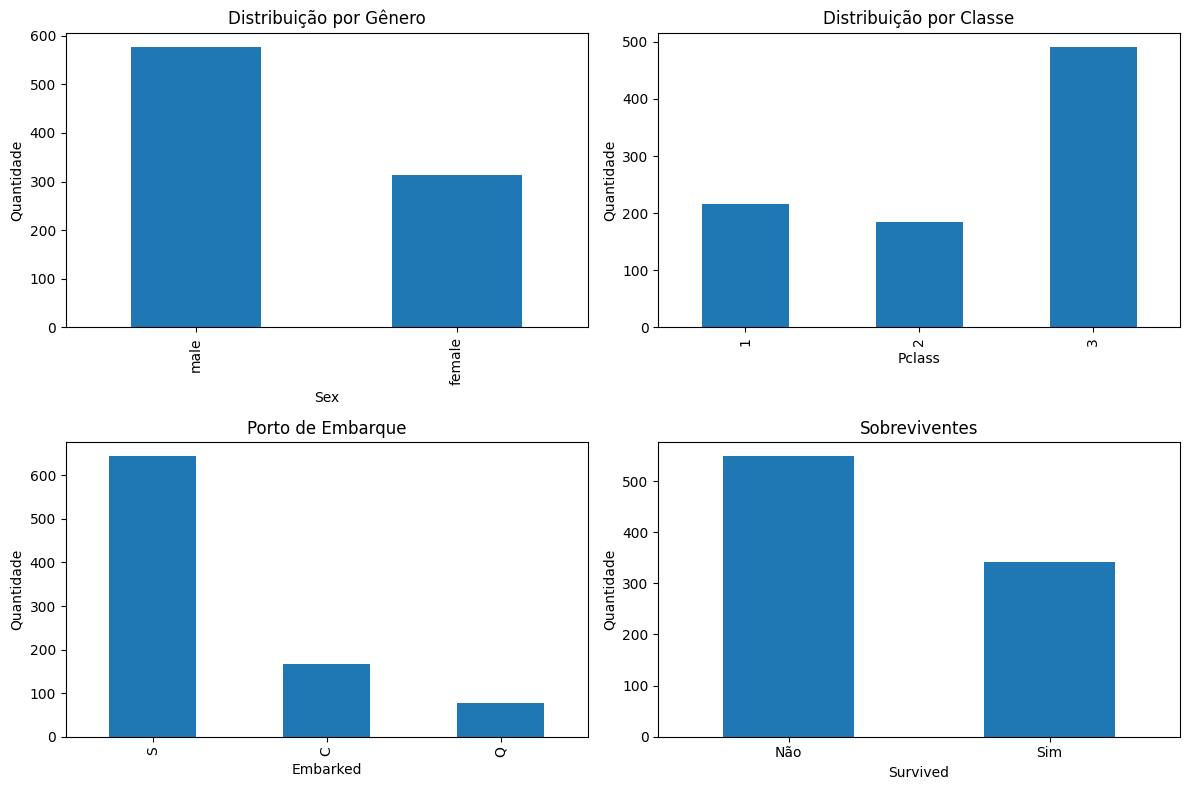

In [15]:
# Gráficos de barras para variáveis categóricas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sex - distribuição por gênero
raw_df['Sex'].value_counts().plot(kind='bar', ax=axes[0,0], title='Distribuição por Gênero')
axes[0,0].set_ylabel('Quantidade')

# Pclass - distribuição por classe
raw_df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], title='Distribuição por Classe')
axes[0,1].set_ylabel('Quantidade')

# Embarked - distribuição por porto de embarque
raw_df['Embarked'].value_counts().plot(kind='bar', ax=axes[1,0], title='Porto de Embarque')
axes[1,0].set_ylabel('Quantidade')

# Survived - distribuição de sobreviventes
raw_df['Survived'].value_counts().plot(kind='bar', ax=axes[1,1], title='Sobreviventes')
axes[1,1].set_ylabel('Quantidade')
axes[1,1].set_xticklabels(['Não', 'Sim'], rotation=0)

plt.tight_layout()
plt.show()

## Visualizações com Seaborn

Mesmos gráficos usando seaborn para comparar sintaxe e resultado visual.

In [16]:
import seaborn as sns

# Configuração do estilo seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

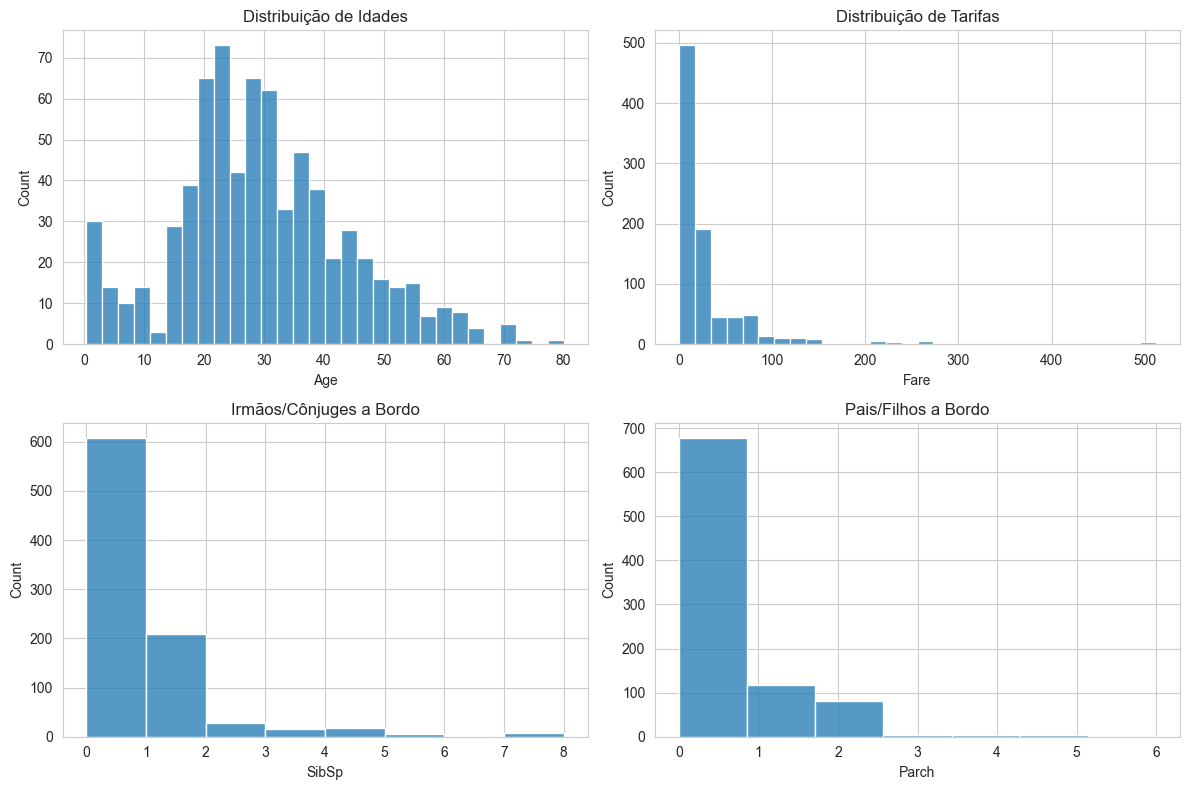

In [17]:
# Histogramas das variáveis numéricas com seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Age - distribuição de idades
sns.histplot(data=raw_df, x='Age', bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribuição de Idades')

# Fare - distribuição de tarifas
sns.histplot(data=raw_df, x='Fare', bins=30, ax=axes[0,1])
axes[0,1].set_title('Distribuição de Tarifas')

# SibSp - irmãos/cônjuges a bordo
sns.histplot(data=raw_df, x='SibSp', bins=8, ax=axes[1,0])
axes[1,0].set_title('Irmãos/Cônjuges a Bordo')

# Parch - pais/filhos a bordo
sns.histplot(data=raw_df, x='Parch', bins=7, ax=axes[1,1])
axes[1,1].set_title('Pais/Filhos a Bordo')

plt.tight_layout()
plt.show()

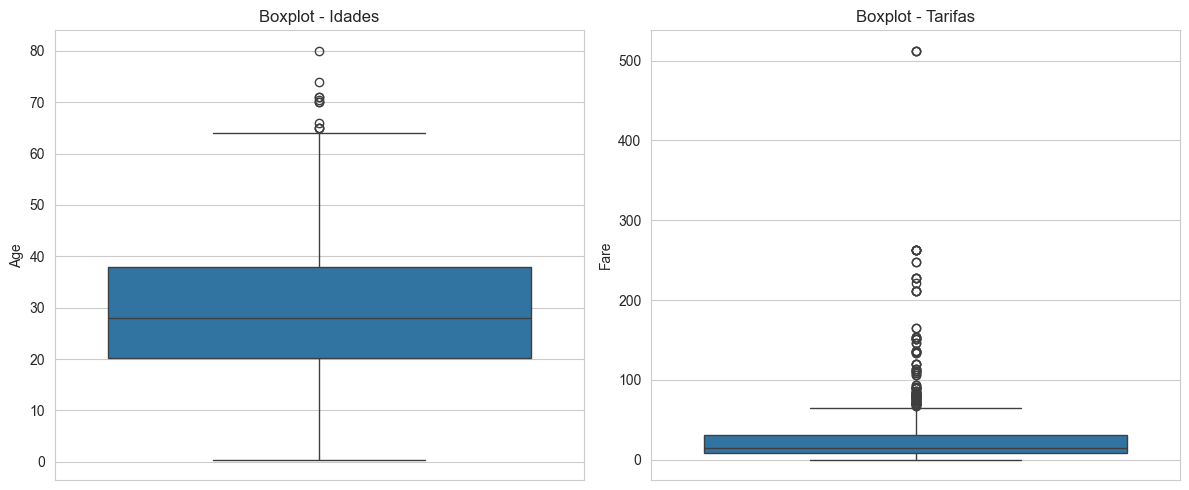

In [18]:
# Boxplots para detectar outliers com seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age - boxplot para outliers de idade
sns.boxplot(data=raw_df, y='Age', ax=axes[0])
axes[0].set_title('Boxplot - Idades')

# Fare - boxplot para outliers de tarifa
sns.boxplot(data=raw_df, y='Fare', ax=axes[1])
axes[1].set_title('Boxplot - Tarifas')

plt.tight_layout()
plt.show()

C:\Users\brunoritter\AppData\Local\Temp\ipykernel_11096\610270265.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['Não', 'Sim'])


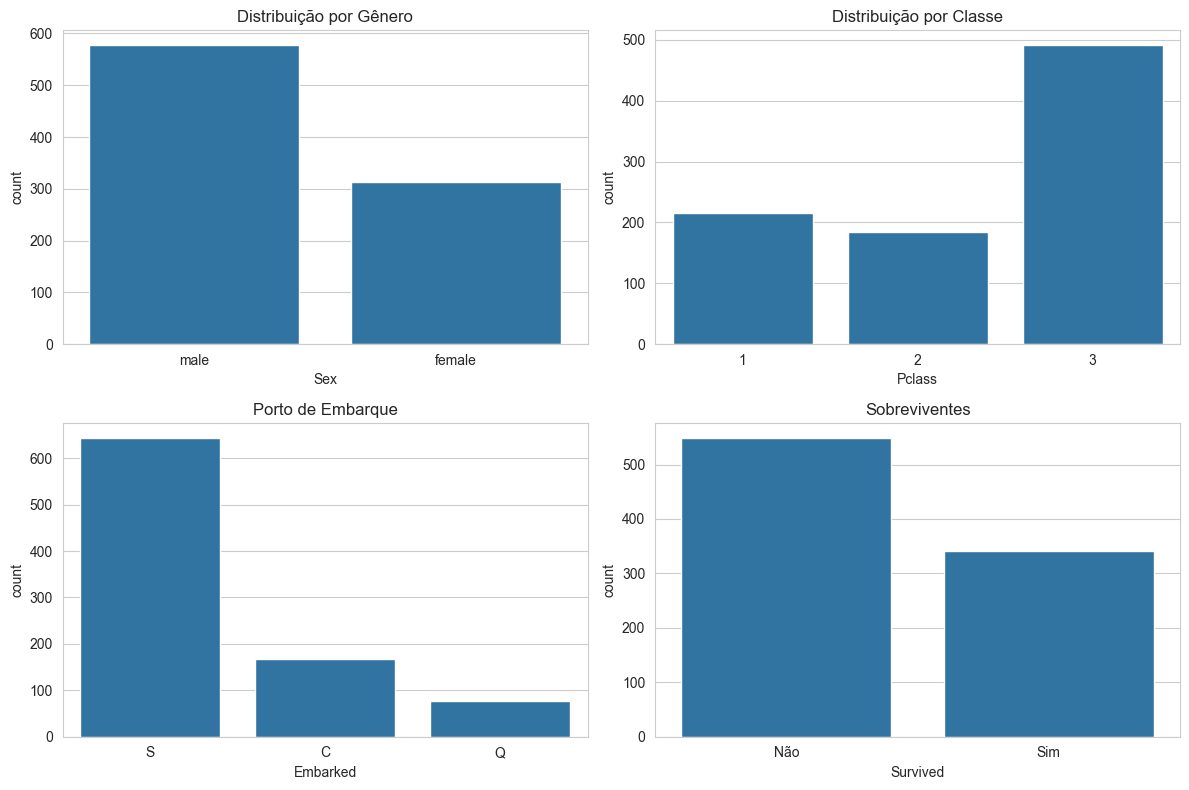

In [19]:
# Gráficos de contagem para variáveis categóricas com seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sex - distribuição por gênero
sns.countplot(data=raw_df, x='Sex', ax=axes[0,0])
axes[0,0].set_title('Distribuição por Gênero')

# Pclass - distribuição por classe  
sns.countplot(data=raw_df, x='Pclass', ax=axes[0,1])
axes[0,1].set_title('Distribuição por Classe')

# Embarked - distribuição por porto de embarque
sns.countplot(data=raw_df, x='Embarked', ax=axes[1,0])
axes[1,0].set_title('Porto de Embarque')

# Survived - distribuição de sobreviventes
sns.countplot(data=raw_df, x='Survived', ax=axes[1,1])
axes[1,1].set_title('Sobreviventes')
axes[1,1].set_xticklabels(['Não', 'Sim'])

plt.tight_layout()
plt.show()